<a href="https://colab.research.google.com/github/nickwinters1/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/Global_Warming_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade seaborn

    100% |████████████████████████████████| 215kB 25.3MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.__version__

'0.9.0'

In [3]:
from google.colab import files
uploaded = files.upload()

Saving GLB.Ts.csv to GLB.Ts.csv


In [25]:
global_mean_temperature = pd.read_csv('GLB.Ts.csv', header=None, names=['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'J_D', 'D_N', 'DJF', 'MAM', 'JJA', 'SON'], na_values=["?"])
global_mean_temperature.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J_D,D_N,DJF,MAM,JJA,SON
0,Station: Global Means,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
2,1880,-.85,-.42,-.49,-.68,-.38,-.50,-.49,.05,-.52,-.68,-.53,-.55,-.51,***,***,-.52,-.32,-.58
3,1881,-.81,-.64,-.38,-.29,-.06,-1.16,-.58,-.30,-.38,-.52,-.61,-.19,-.50,-.53,-.67,-.25,-.68,-.50
4,1882,.06,-.16,-.13,-.64,-.43,-1.07,-.76,-.17,-.13,-.36,-.44,-.72,-.41,-.37,-.10,-.40,-.67,-.31


In [26]:
global_mean_temperature = global_mean_temperature.iloc[110:]
global_mean_temperature

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J_D,D_N,DJF,MAM,JJA,SON
110,1988,.67,.49,.62,.50,.62,.59,.44,.57,.55,.55,.18,.38,.52,.53,.58,.58,.54,.43
111,1989,.25,.45,.44,.41,.18,.14,.48,.52,.54,.44,.23,.40,.37,.37,.36,.35,.38,.40
112,1990,.53,.42,.86,.64,.55,.46,.62,.43,.31,.52,.54,.48,.53,.52,.45,.68,.50,.46
113,1991,.50,.62,.48,.73,.43,.69,.63,.56,.63,.35,.34,.34,.52,.54,.53,.55,.63,.44
114,1992,.52,.44,.55,.24,.27,.30,.08,.14,-.02,.10,.04,.26,.24,.25,.43,.35,.17,.04
115,1993,.40,.42,.34,.31,.28,.27,.39,.22,.11,.24,.09,.18,.27,.28,.36,.31,.29,.14
116,1994,.39,.08,.28,.53,.28,.59,.41,.27,.42,.42,.53,.45,.39,.37,.22,.36,.42,.45
117,1995,.58,.90,.53,.59,.38,.51,.66,.58,.47,.69,.55,.42,.57,.57,.64,.50,.58,.57
118,1996,.43,.62,.46,.52,.34,.34,.58,.78,.43,.35,.52,.54,.49,.48,.49,.44,.57,.44
119,1997,.48,.56,.68,.40,.43,.68,.34,.45,.50,.60,.72,.69,.54,.53,.53,.50,.49,.61


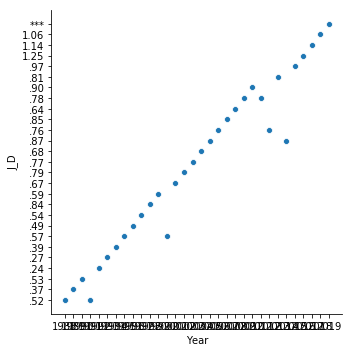

In [29]:
sns.relplot('Year','J_D', data=global_mean_temperature, alpha=1.0)

In [31]:
sns.pairplot(global_mean_temperature.J_D)

TypeError: ignored